In [79]:
import pandas as pd
df = pd.read_csv('final_table.csv')
df.head(5)

,Unnamed: 0,Age,Primary_streaming_service,Hours_per_day,While_working,Instrumentalist,Composer,Fav_genre,Exploratory,Foreign_languages,...,Anxiety,Depression,Insomnia,OCD,Music_effects,Date,Time,Year,Month,Day
0,0,25,Apple Music,2,False,False,False,EDM,False,True,...,10,3,1,4,Improve,2022-08-28,23:26:58,2022,8,28
1,1,16,Other streaming service,4,True,False,False,EDM,True,True,...,4,7,1,3,Improve,2022-09-13,01:55:43,2022,9,13
2,2,22,Spotify,10,False,True,True,EDM,False,True,...,4,7,7,3,Improve,2022-08-28,17:15:18,2022,8,28
3,3,26,Spotify,6,True,False,False,EDM,False,True,...,10,10,8,2,No effect,2022-08-30,05:16:13,2022,8,30
4,4,18,I do not use a streaming service.,4,True,True,False,EDM,False,True,...,8,7,10,6,Improve,2022-09-02,09:25:05,2022,9,2


In a graph display the sum of each fav genre

<Axes: xlabel='Fav_genre'>

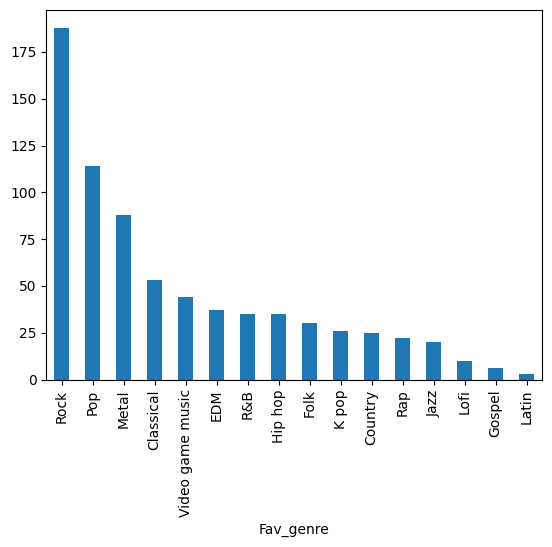

In [80]:
df['Fav_genre'].value_counts().plot(kind='bar')

In a graph display the sum and the average for anxiety, depression, insomnia, ocd

Display the anxiety distribution using a histogram

<Axes: xlabel='Anxiety', ylabel='Count'>

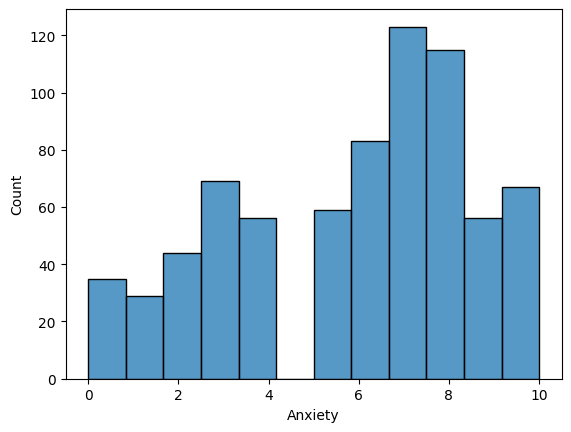

In [81]:
sns.histplot(df['Anxiety'])

Create a new data frame with only columns fav genre and anxiety but we want to keep only jazz in the fav genre column

In [82]:
df_jazz_anxiety = df[['Fav_genre', 'Anxiety']]
df_jazz_anxiety

,Fav_genre,Anxiety
0,EDM,10
1,EDM,4
2,EDM,4
3,EDM,10
4,EDM,8
...,...,...
731,Hip hop,2
732,Classical,7
733,Classical,6
734,Video game music,10


# Jazz analysis

Filter to keep only Jazz in fav genre

In [83]:
df_jazz_anxiety = df_jazz_anxiety[df_jazz_anxiety['Fav_genre'] == 'Jazz']
df_jazz_anxiety

,Fav_genre,Anxiety
25,Jazz,2
26,Jazz,9
27,Jazz,6
28,Jazz,3
29,Jazz,9
30,Jazz,7
31,Jazz,0
245,Jazz,7
246,Jazz,10
247,Jazz,8


using a graph displaying the correlation between jazz and anxiety

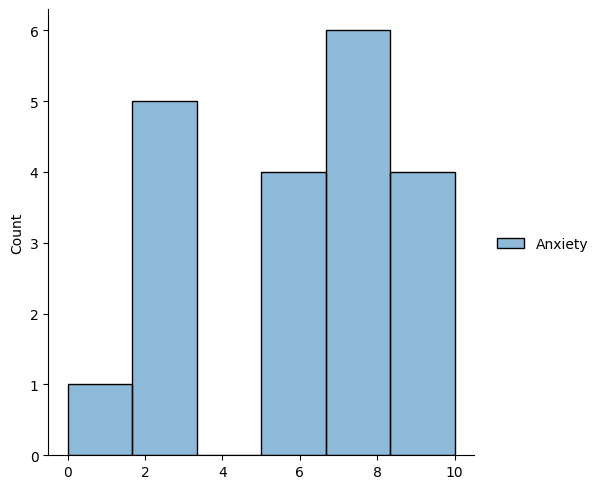

In [84]:
sns.displot(df_jazz_anxiety)

# Fav genre and Mental Health Issues (MHI)

Create a new dataframe with only fav genre, Anxiety,	Depression,	Insomnia,	OCD

In [85]:
df_genre_mental = df[['Fav_genre', 'Anxiety', 'Depression', 'Insomnia', 'OCD']]
df_genre_mental

,Fav_genre,Anxiety,Depression,Insomnia,OCD
0,EDM,10,3,1,4
1,EDM,4,7,1,3
2,EDM,4,7,7,3
3,EDM,10,10,8,2
4,EDM,8,7,10,6
...,...,...,...,...,...
731,Hip hop,2,2,2,5
732,Classical,7,9,2,8
733,Classical,6,6,8,2
734,Video game music,10,10,8,4


Display the average of anxiety, depression, insomnia, ocd grouped by fav genre

In [86]:
df_genre_mental.groupby('Fav_genre').mean()

,Anxiety,Depression,Insomnia,OCD
Fav_genre,,,,
Classical,4.886792,4.075472,3.792453,2.377358
Country,5.400000,4.320000,2.720000,2.760000
EDM,5.486486,5.243243,3.972973,3.000000
Folk,6.566667,5.066667,3.633333,2.200000
Gospel,4.833333,2.666667,5.333333,0.333333
Hip hop,6.200000,5.800000,3.428571,2.714286
Jazz,5.900000,4.500000,3.850000,2.800000
K pop,6.230769,4.423077,3.461538,2.538462
Latin,4.333333,3.000000,3.333333,1.666667


Calculate the total mean for every MHI

In [87]:
df_genre_mental.groupby('Fav_genre').mean().mean()

Anxiety       5.627498
Depression    4.549103
Insomnia      3.755430
OCD           2.501580
dtype: float64

Display df_genre_mental in a graph visualization

<Axes: xlabel='Fav_genre'>

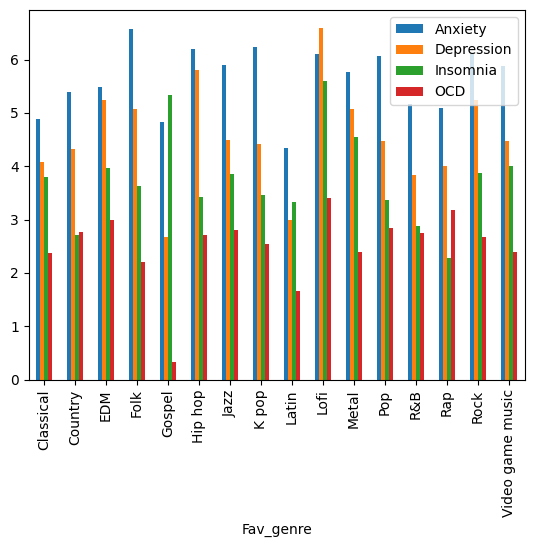

In [88]:
df_genre_mental.groupby('Fav_genre').mean().plot(kind='bar')

Display the same data but in a stacked bar chart

<Axes: xlabel='Fav_genre'>

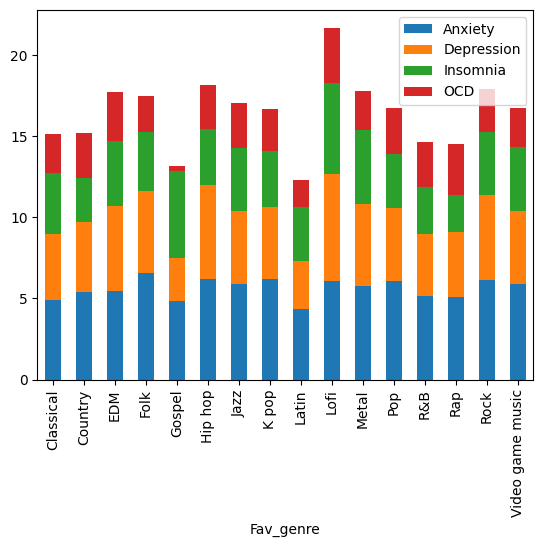

In [89]:
df_genre_mental.groupby('Fav_genre').mean().plot(kind='bar', stacked=True)

#***Correlation between Lofi and Depression***

# Chi-square test

In [93]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Filter the necessary columns and create a copy
df = df[['Fav_genre', 'Depression']].copy()

# Create a binary column for Lofi genre
df.loc[:, 'Lofi'] = df['Fav_genre'].apply(lambda x: 1 if x == 'Lofi' else 0)

# Create a binary column for Depression (assuming threshold for depression is > 0)
df.loc[:, 'Depressed'] = df['Depression'].apply(lambda x: 1 if x > 0 else 0)

# Create contingency table
contingency_table = pd.crosstab(df['Lofi'], df['Depressed'])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display results
chi2, p, dof, expected


(0.4123806787498926,
 0.5207636334764913,
 1,
 array([[ 82.85869565, 643.14130435],
        [  1.14130435,   8.85869565]]))

Interpretation :
With 0.41 as Chi-square result we can assume there is a high correlation between Lofi and Depression (0.41>0.05)

# T-test

In [94]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

# Filter the necessary columns and create a copy
df = df[['Fav_genre', 'Depression']].copy()

# Create a binary column for Lofi genre
df.loc[:, 'Lofi'] = df['Fav_genre'].apply(lambda x: 1 if x == 'Lofi' else 0)

# Group data by 'Lofi' preference
lofi_group = df[df['Lofi'] == 1]['Depression']
non_lofi_group = df[df['Lofi'] == 0]['Depression']

# Perform the t-test
t_stat, p_val = ttest_ind(lofi_group, non_lofi_group, nan_policy='omit')

# Display results
t_stat, p_val


(1.9005408523071525, 0.057753706237642505)

#Anova

In [95]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway

# Filter the necessary columns and create a copy
df = df[['Fav_genre', 'Depression']].copy()

# Group data by favorite genre
grouped_data = [group['Depression'].values for name, group in df.groupby('Fav_genre')]

# Perform the ANOVA test
f_stat, p_val = f_oneway(*grouped_data)

# Display results
f_stat, p_val


(1.9073536591443745, 0.01971603352312684)